 # Survival Expectancy Analysis - Cox Proportional Hazards Regression

 
 # Heart Failure Prediction
    
   Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives 
   each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by CVDs and this
   dataset contains 12 features that can be used to predict mortality by heart failure.

   Most cardiovascular diseases can be prevented by addressing behavioral risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

   People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk 
   factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and 
   management wherein a machine learning model can be of great help.
    
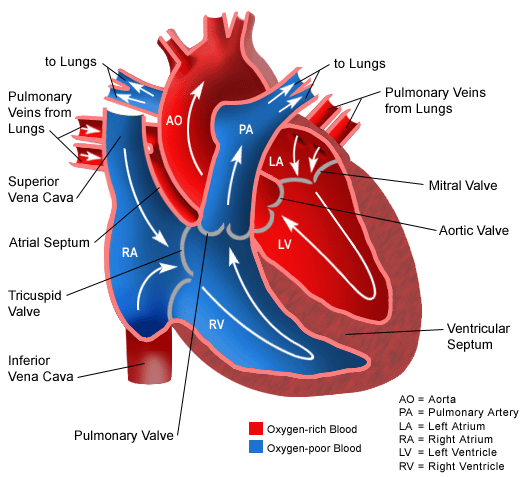
    
 ## Dataset Link 
 
[1] https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5#Sec2

[2] https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0181001#sec010
 
 ## Dataset Description
 
 Feature | Explanation | Measurement	| Range
------------- | ------------- |------------- | -------------
Age	|Age of the patient	|Years |	[40,..., 95]
Anaemia	|Decrease of red <br> blood cells or hemoglobin |	Boolean|	0, 1
High blood pressure |	If a patient has hypertension |	Boolean	 |0, 1
Creatinine phosphokinase<br>(CPK) |	Level of the CPK enzyme <br>in the blood |	mcg/L|	[23,..., 7861]
Diabetes|	If the patient has diabetes |	Boolean	| 0, 1
Ejection fraction|	Percentage of blood leaving<br>the heart at each contraction|Percentage	|	[14,..., 80]
Sex	| Woman or man |	Binary|	0, 1
Platelets|	Platelets in the blood|	kiloplatelets/mL|	[25.01,..., 850.00]
Serum creatinine|	Level of creatinine in the blood|	mg/dL|	[0.50,..., 9.40]
Serum sodium|	Level of sodium in the blood|	mEq/L|	[114,..., 148]
Smoking|	If the patient smokes|	Boolean	|0, 1
Time|	Follow-up period|	Days|	[4,...,285]
DEATH EVENT<br>(TARGET)|	If the patient died during the follow-up period|	Boolean|	0, 1

**NOTE: mcg/L: micrograms per liter. mL: microliter. mEq/L: milliequivalents per litre**
 
 ### References
 
    Machine learning can predict survival of patients with heart failure from serum creatinine and 
    ejection fraction alone. (03 February 2020)
   https://doi.org/10.1186/s12911-020-1023-5

### Install Required Libraries

In [1]:
# For survival analysis, we will use the lifelines library which exclusively 
# supports survival analysis functions and estimates. 

# Reference:

#  [1] https://lifelines.readthedocs.io/en/latest/index.html
#  [2] https://lifelines.readthedocs.io/en/latest/fitters/univariate/KaplanMeierFitter.html

# Uncomment the folowing statement if there is an error importing KaplanMeierUtils in the next cell.
# !pip install lifelines

### Required Libraries and Utilities

In [2]:
# Import the required libraries & modules
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split

from ReusableUtils import ReusableUtils
utils = ReusableUtils()

from lifelines import CoxPHFitter 

### Set Notebook Configuration Parameters 

In [3]:
utils.setNotebookConfigParams()

### Import Data

In [4]:
heart_faliure_data = pd.read_csv(filepath_or_buffer = './data/heart_failure_clinical_records_dataset.csv', 
                                 low_memory = False, 
                                 skipinitialspace = True, 
                                 float_precision = 'round_trip')

In [5]:
heart_faliure_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
heart_faliure_data.shape

(299, 13)

In [7]:
# Check the total missing values in each column.
print("Total NULL Values in each columns")
print("*********************************")
print(heart_faliure_data.isnull().sum())

Total NULL Values in each columns
*********************************
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


***This looks to be a clean dataset without any missing values...***

In [8]:
heart_faliure_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


### Test Dataset

In [9]:
textIdxs = [42, 298, 5, 193, 179]

# extract the test data rows
test_set = heart_faliure_data.iloc[textIdxs]

#drop those rows from the train set
heart_faliure_data.drop(textIdxs, axis = 0, inplace=True)

heart_faliure_data.shape

(294, 13)

#### Reset the row indexs

In [10]:
test_set['Patient'] = 'Patient - ' + test_set.index.astype(str)
test_set.set_index('Patient', drop = True, inplace = True)
test_set

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
Patient,,,,,,,,,,,,,
Patient - 42,70.0,0,571,1,45,1,185000.0,1.20,139,1,1,33,1
Patient - 298,50.0,0,196,0,45,0,395000.0,1.60,136,1,1,285,0
Patient - 5,90.0,1,47,0,40,1,204000.0,2.10,132,1,1,8,1
Patient - 193,73.0,1,231,1,30,0,160000.0,1.18,142,1,1,180,0
Patient - 179,55.0,0,835,0,40,0,279000.0,0.70,140,1,1,147,0


# Survival Analysis - Cox Proportional Hazards Model

Cox Proportional Hazards Model introduced by D.Cox allows to compute survival regressions on the time duration using the censored subjects and the features available as part of the dataset based on small intervals containing at most one event of interest. The dependent variable is a hazard function at any given time and the model follows the concept of gradient descent for optimization. Cox model works in a way that the logarithm hazard function for a particular subject act as a linear function of the relevant static features while the hazard function at the population-level changes over time. Mathematically, the hazard model is defined as – 

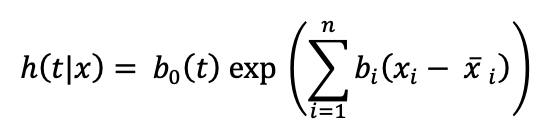

where,
- h(t|x) represents the hazard function.
- b0(t) represents the baseline hazard.
- the summation term represents the log-partial hazard.
- the full exp(…) term  represents the partial hazard.

### Hazard and Hazard Ratio

1. **Hazard**: Hazard is essentially the inverse of survival, or the probability of failure (death event). It basically represents the **slope of the survival curve** — a measure of how rapidly subjects are dying.

2. **Hazard ratio**: The hazard ratio is the ratio of the hazard rates corresponding to the conditions described by two levels of an explanatory variable. For example, in a drug study, the treated population may die at twice the rate per unit time of the control population. The hazard ratio would be 2, indicating higher hazard of death from the treatment.

### Proportional Hazards Assumption

1. The most important consideration of the Cox Proportional Hazard equation is that only the baseline hazard is a function of time t, but not the parameters, and the partial hazard is a function of the parameters, but not time. This underpins what is referred to as the proportional hazard assumption.

2. The proportional hazard assumption states that in the context of a Cox Proportional Hazard model, the hazard ratio between two groups is proportional over time. This assumption is implicit in the equation above because the lack of t in the partial hazard means that the partial hazard changes the hazard ratio by some factor, independent of time. [3]

**References -**

1. D. R. Cox, “Regression Models and Life-Tables,” J. R. Stat. Soc. Ser. B, vol. 34, no. 2, pp. 187–220, Apr. 1972, [Online]. Available: http://www.jstor.org/stable/2985181.
2. C. Davidson-Pilon et al., “lifelines: survival analysis in Python,” J. Open Source Softw., vol. 4, no. 40, p. 1317, May 2019, doi: 10.5281/ZENODO.4816284.
3. Cox Proportional Hazards: https://databricks.com/notebooks/telco-accel/03_cox_proportional_hazards.html
4. Hazard Ratio - https://en.wikipedia.org/wiki/Hazard_ratio

# Cox PH Fitter

In [11]:
CoxFitter = CoxPHFitter(alpha=0.05)

In [12]:
CoxFitter.fit(heart_faliure_data, duration_col='time', 
              event_col='DEATH_EVENT',
              show_progress = True)

Iteration 1: norm_delta = 1.02607, step_size = 0.9000, log_lik = -496.52054, newton_decrement = 42.25692, seconds_since_start = 1.6
Iteration 2: norm_delta = 0.23672, step_size = 0.9000, log_lik = -464.29741, newton_decrement = 5.78546, seconds_since_start = 1.6
Iteration 3: norm_delta = 0.08219, step_size = 0.9000, log_lik = -458.02487, newton_decrement = 0.78917, seconds_since_start = 1.6
Iteration 4: norm_delta = 0.01902, step_size = 1.0000, log_lik = -457.14787, newton_decrement = 0.02959, seconds_since_start = 1.6
Iteration 5: norm_delta = 0.00079, step_size = 1.0000, log_lik = -457.11750, newton_decrement = 0.00005, seconds_since_start = 1.6
Iteration 6: norm_delta = 0.00000, step_size = 1.0000, log_lik = -457.11745, newton_decrement = 0.00000, seconds_since_start = 1.6
Convergence success after 6 iterations.


<lifelines.CoxPHFitter: fitted with 294 total observations, 200 right-censored observations>

## Insight

Since we extracted data of 5 subjects to be kept for testing, we had 294 observations in total to fit the model out of which there are 200 right-censored observations who have not yet had the event (or may have left the study).

# Goodness of Fit

### Visual Representation of the coefficients (i.e. log hazard ratios)

<AxesSubplot:xlabel='log(HR) (95% CI)'>

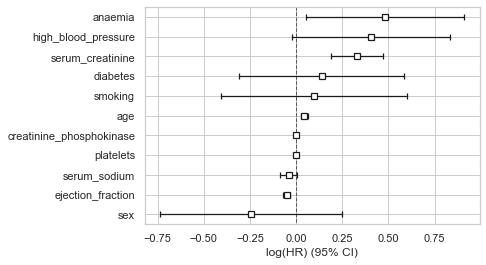

In [13]:
# Plot a visual representation of the coefficients (i.e. log hazard ratios), 
# including their standard errors and magnitudes.
CoxFitter.plot()

<AxesSubplot:xlabel='HR (95% CI)'>

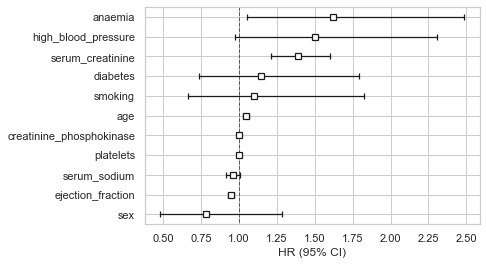

In [14]:
# Plot a visual representation of the hazard ratios, 
# including their standard errors and magnitudes.
CoxFitter.plot(hazard_ratios = True)

## Insights

1. The 2 plots above shows the visual representation of the coefficients - **log hazard ratios** and **hazard ratios** respectively, including their standard errors and magnitudes. 

2.  **Anemia**, **High Blood Pressure**, **Serum Creatinine**, **Age** and, **Ejection Fraction** are all within the 95% confidence interval of influencing the DEATH event.

### Test the Proportional Hazards Assumption

In [15]:
_ = CoxFitter.check_assumptions(heart_faliure_data, show_plots=True)

Proportional hazard assumption looks okay.


### Summary Statistics Describing the Fit

In [16]:
CoxFitter.print_summary(decimals=3)

<lifelines.CoxPHFitter: fitted with 294 total observations, 200 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 294
number of events observed = 94
   partial log-likelihood = -457.117
         time fit was run = 2022-05-02 18:28:42 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
age                       0.045      1.046      0.009            0.026            0.063                1.026                1.065
anaemia                   0.481      1.618      0.219            0.052            0.911                1.053                2.486
creatinine_phosphokinase  0.000      1.000      0.000            0.000            0.000                1.000                1.000
diabetes                  0.138      1.148      0.227           -0.308            0.584                0.735                1.793
ejection_fraction        -0.051      0.950      0.011           -0.072           -0.031                0.930                0.970
high_blood_pressure       0.406      1.500      0.219           -0.024            0.836                0.976                2.306
platelets                -0.000      1.000      0.000           -0.000            0.000                1.000                1.000
serum_creatinine          0.331      1.392      0.071            0.191            0.470                1.211                1.600
serum_sodium             -0.040      0.960      0.024           -0.087            0.006                0.917                1.006
sex                      -0.244      0.784      0.252           -0.738            0.250                0.478                1.284
smoking                   0.096      1.101      0.257           -0.408            0.600                0.665                1.822

                           cmp to      z       p   -log2(p)
covariate                                                  
age                         0.000  4.714 <0.0005     18.654
anaemia                     0.000  2.198   0.028      5.159
creatinine_phosphokinase    0.000  2.275   0.023      5.449
diabetes                    0.000  0.606   0.545      0.877
ejection_fraction           0.000 -4.822 <0.0005     19.421
high_blood_pressure         0.000  1.849   0.064      3.955
platelets                   0.000 -0.282   0.778      0.362
serum_creatinine            0.000  4.646 <0.0005     18.175
serum_sodium                0.000 -1.695   0.090      3.474
sex                         0.000 -0.967   0.334      1.583
smoking                     0.000  0.372   0.710      0.495
---
Concordance = 0.740
Partial AIC = 936.235
log-likelihood ratio test = 78.806 on 11 df
-log2(p) of ll-ratio test = 38.536

## Insight

### Statistical Significance
1. **Age**, **Serum Creatinine**, and **Ejection Fraction** have **p values <0.0005** making them statistically significant and are highly correlated to the death event. 	

### Confidence Levels of the Coefficient Estimates - 

2. The upper and lower bounds for each coefficient and exp(coef) can be seen in the model summary above. These bounds can also be viewed visually in the plots although it's not seen in the plots above. However, the summary shows that for each covariate the coefficients lie within the bounds.

### Hazard Ratio (HR)
3. The value **exp(coef)** is called the **hazard ratio** which indicates ***how much the baseline hazard changes due to one-unit change in the corresponding factor***. A higher hazard means more at risk of the event occurring. 

     - The hazard ratio is the multiplicative effect of the covariate.
        - HR = 1 indicates no effect.
        - HR > 1 indicates an increase in the hazard as the covariate value rises.
        - HR < 1 indicates a decrease in the hazard as the covariate value rises.
     - For example, if **ejection fraction** changes by one unit:
        - coefficient: -0.051
        - hazards ratio: 0.95
        - hazards change: 0.95 – 1 = -0.05
        - survival time change: (1/0.95) - 1 = 0.052 → 5.2% increase in survival time
        - The probability of death event **decreases by 5.2%** for each unit increase in the ejection fraction.
     - Similarly, the effect of hazard ratio change can be computed for other features.
     - HR for **Creatinine Phosphokine** and **Platelets** is equal to 1 and consequently do not affect the death event.
     
### Concordance
4. The C-statistic gives the probability a randomly selected patient who experienced an event (e.g. a disease or condition) had a higher risk score than a patient who had not experienced the event. 

    Concordance index is a measure of **how discriminant your model is**. 
    For survival analysis, say you have a covariate 𝑋 and a survival time 𝑇. Assume that higher values of 𝑋 imply shorter value for 𝑇 (thus **𝑋 has a deleterious effect on 𝑇**). Discrimination means that you are able to say, with high reliability, that between two patients which one will have a shorter survival time. [2]

    It is equal to the area under the ROC curve and ranges from **[0.5 - 1]**.

    - A value below 0.5 indicates a very poor model. Such model is no better than predicting an outcome than random chance.
    - Values over 0.7 indicate a good model.
    - Values over 0.8 indicate a strong model.
    - A value of 1 means that the model perfectly predicts those group members who will experience a certain outcome and those who will not.

**The Concordance statistic for the current fit is 0.740 indicative of a good model.**

#### Reference:
1. C-Statistic: Definition, Examples, Weighting and Significance https://www.statisticshowto.com/c-statistic/
2. Introduction & Description of the C-index  - https://stats.stackexchange.com/questions/478294/how-the-concordance-index-is-calculated-in-cox-model-if-the-actual-event-times-a/478305#478305

## Test Data
### Survival Function for Individuals

In [17]:
# Predict the survival function for individuals, given their covariates. This assumes that the individual
# just entered the study (that is, we do not condition on how long they have already lived for.)
survival_function_data = CoxFitter.predict_survival_function(test_set)

# extract the head 10 and tail 10 for analysis...
head = survival_function_data.head(10)
tail = survival_function_data.tail(10)

utils.display_dataframe_side_by_side(dataframes = [head, tail], 
                                     table_captions = ['First 10 days...', 'Last 10 days...'], 
                                     master_caption = 'Survival Probabilities over a time period of 280 days...',
                                     tablespacing = 15)

Survival Probabilities over a time period of 280 days...

,Patient - 42,Patient - 298,Patient - 5,Patient - 193,Patient - 179
4.0,0.998049,0.999487,0.986352,0.995726,0.999371
6.0,0.996077,0.998968,0.972722,0.991416,0.998735
7.0,0.992129,0.997926,0.945912,0.982817,0.997458
8.0,0.990145,0.997402,0.932683,0.978512,0.996815
10.0,0.978008,0.994176,0.855153,0.952398,0.992863
11.0,0.973273,0.992909,0.826442,0.942314,0.991313
12.0,0.973273,0.992909,0.826442,0.942314,0.991313
13.0,0.970899,0.992272,0.812365,0.937281,0.990533
14.0,0.966155,0.990996,0.784839,0.927264,0.988972
15.0,0.961395,0.989712,0.758036,0.917276,0.987400


## Insight

We analyze the survival probabilities of the subjects in the test cohort. The probabilities are returned for a period of 280 days. This assumes that the subjects just entered the study (i.e., it does not consider the time of how long they have already lived for). The following observations are noted - 

   1. For each subject in the test cohort, the survival probability starts with high survival chances revolving around the 98-99% mark.
   2. PATIENT-298 and PATIENT-179: The survival probability remain consistent through out the period with 88% and 85.5% respectively around the 280th day.
   3. PATIENT-42 and PATIENT-193: The survival probability hovers around 61% and 34% respectively at the end of 280 days.
   4. PATIENT-5: The chances of survival quickly starts to show a decreasing trend. By the end of day 15 the survival chance is ~75%, by day 38 hovers around the 50% mark, and by the end of 180 days falls below 10%.


### Survival Function Plot

<AxesSubplot:title={'center':'Survival Function for Individuals'}, xlabel='No. of Days', ylabel='Survival Function'>

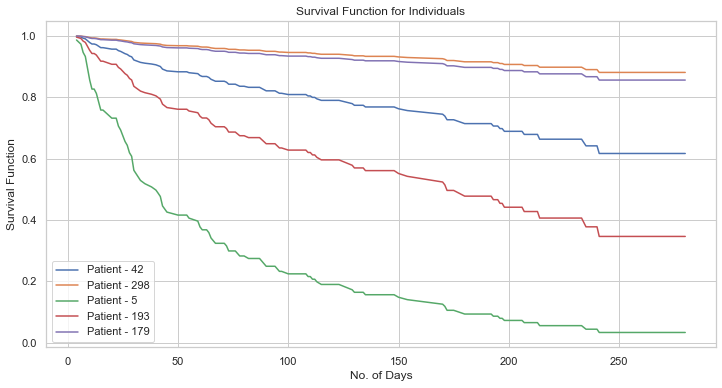

In [18]:
survival_function_data.plot(figsize=(12, 6), 
                            title = "Survival Function for Individuals", 
                            xlabel = "No. of Days", 
                            ylabel = "Survival Function")

In [19]:
CoxFitter.predict_expectation(test_set)

Patient - 42     212.394638
Patient - 298    257.168883
Patient - 5       63.755281
Patient - 193    159.292290
Patient - 179    253.138647
dtype: float64